In [1]:
from sportsipy.mlb.teams import Teams
from scipy.stats import pearsonr,skew,kurtosis,norm
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import collections
import numpy as np
import matplotlib.mlab as mlab
from matplotlib.ticker import PercentFormatter
from scipy.interpolate import make_interp_spline, BSpline

In [10]:
counter=collections.Counter(teamcList)
yv = list(counter.values())
yk = list(counter.keys())
yearV = []
for k,v in zip(yk,yv):
    yearV.append(int(v/k))
print(pd.DataFrame((zip(yk,yv,yearV)),columns=['teams','freq','numSeasons']).to_string(index=False))
print('\navg # teams: '+str(round(np.average(yk, weights=yv),2))+'\ntotal seasons: '+str(sum(yearV)))

 teams  freq  numSeasons
    24   168           7
    26   416          16
    28   140           5
    30   690          23

avg # teams: 27.91
total seasons: 51


In [9]:
sum(yearV)

51

In [ ]:
print('Correlation(WinRatio,GoalsForRatio)\n')

maxCorr= -1.1
minCorr= 1.1
minYear = 2021
maxYear = 2021
corrList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
                    G = team.games
                    GF = int(G*team.runs)
                    GA = int(G*team.runs_against)
                    statd[i] = {'Team' : team.name,
                    'W' : team.wins,
                    'L' : team.losses,
                    'G' : G,
                    'WinPct' : round(100*team.wins/G,3),
                    'GF' : GF,
                    'GA' : GA,
                    'GD' : GF-GA,
                    'GfrPct' : round(100*GF/(GF+GA),3),
                    'GD_per' : round((GF-GA)/G,2)}
                    
    df = pd.DataFrame(statd)
    df = df.transpose()

    corr, _ = pearsonr(df['GfrPct'].tolist(), df['WinPct'].tolist())
    corrList.append(corr)
    
    if maxCorr < minCorr:
        minCorr = corr
        maxCorr = corr
        minYear = year
        maxYear = year
        print('%s: %s (new min) (new max)' % (year,round(corr,3)))
    elif corr < minCorr:
        minCorr= corr
        minYear = year
        print('%s: %s (new min)' % (year,round(corr,3)))
    elif corr > maxCorr:
        maxCorr= corr
        maxYear = year
        print('%s: %s (new max)' % (year,round(corr,3)))
    else: 
        print('%s: %s' % (year,round(corr,3)))

print('MIN:%s (%s)' % (minYear,round(minCorr,3)))
print('MAX:%s (%s)' % (maxYear,round(maxCorr,3)))
print('AVG:%s' % (round(sum(corrList)/len(corrList),3)))

Correlation(WinRatio,GoalsForRatio)

1970: 0.92 (new min) (new max)
1971: 0.96 (new max)
1972: 0.904 (new min)
1973: 0.933


In [4]:
year=1984
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
                    G = team.games
                    GF = int(G*team.runs)
                    GA = int(G*team.runs_against)
                    statd[i] = {'Team' : team.name,
                    'W' : team.wins,
                    'L' : team.losses,
                    'G' : G,
                    'WinPct' : round(100*team.wins/G,3),
                    'GF' : GF,
                    'GA' : GA,
                    'GD' : GF-GA,
                    'GfrPct' : round(100*GF/(GF+GA),3),
                    'GD_per' : round((GF-GA)/G,2)}
                    
df = pd.DataFrame(statd)
df = df.transpose()

l = df[['WinPct','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Iwin'] =  index

l = df[['GfrPct','WinPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igfp'] =  index

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','L','G','GF','GA','WinPct','GD','GD_per','GfrPct','Iwin','Igfp','Delta','Idel']]
df = df.sort_values(['WinPct'],ascending = (False))
df['WINvs50'] = df['WinPct']-50
df_mdian = df.loc[abs(df['GD']) == min(abs((df['GD'])))]
df_mdian = df_mdian[abs(df_mdian['WINvs50']) == min(abs(df_mdian['WINvs50']))].head(1)
df_lucky = df[df['Delta'] == max(df['Delta'])].head(1)
df_nluck = df[df['Delta'] == min(df['Delta'])].head(1)
print('%s Luckiest,Median,Unluckiest Teams:' % year)
df_ext = pd.concat([df_lucky,pd.concat([df_mdian,df_nluck],sort=False)],sort=False)
print(df_ext.to_string(index=False))

1984 Luckiest,Median,Unluckiest Teams:
               Team   W   L    G   GF   GA  WinPct   GD GD_per  GfrPct  Iwin  Igfp  Delta  Idel WINvs50
      New York Mets  90  72  162  648  680  55.556  -32   -0.2  48.795     3    18     15     0   5.556
    Minnesota Twins  81  81  162  680  680      50    0      0      50    11    13      2     4       0
 Pittsburgh Pirates  75  87  162  615  567  46.296   48    0.3   52.03    18     4    -14    25  -3.704


In [ ]:
'''
1984 Luckiest,Median,Unluckiest Teams: (most anomolous)
               Team   W   L    G   GF   GA  WinPct   GD GD_per  GfrPct  Iwin  Igfp  Delta  Idel WINvs50
      New York Mets  90  72  162  648  680  55.556  -32   -0.2  48.795     3    18     15     0   5.556
    Minnesota Twins  81  81  162  680  680      50    0      0      50    11    13      2     4       0
 Pittsburgh Pirates  75  87  162  615  567  46.296   48    0.3   52.03    18     4    -14    25  -3.704
    
2010 Luckiest,Median,Unluckiest Teams: (most predictable)
             Team   W   L    G   GF   GA  WinPct    GD GD_per  GfrPct  Iwin  Igfp  Delta  Idel WINvs50
   Houston Astros  76  86  162  615  729  46.914  -114   -0.7  45.759    21    25      4     0  -3.086
   Detroit Tigers  81  81  162  745  745      50     0      0      50    15    15      0    10       0
 Colorado Rockies  83  79  162  777  712  51.235    65    0.4  52.183    13    10     -3    28   1.235
'''

In [17]:
year=1970
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
                    G = team.games
                    GF = int(G*team.runs)
                    GA = int(G*team.runs_against)
                    statd[i] = {'Team' : team.name,
                    'W' : team.wins,
                    'L' : team.losses,
                    'G' : G,
                    'WinPct' : round(100*team.wins/G,3),
                    'GF' : GF,
                    'GA' : GA,
                    'GD' : GF-GA,
                    'GfrPct' : round(100*GF/(GF+GA),3),
                    'GD_per' : round((GF-GA)/G,2)}
                    
df = pd.DataFrame(statd)
df = df.transpose()

l = df[['WinPct','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Iwin'] =  index

l = df[['GD','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igd'] =  index

'''
x = list(df['GD'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igd'] =  index'
'''

l = df[['GfrPct','WinPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igfp'] =  index

'''
x = list(df['GfrPct'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igfp'] =  index
'''    
df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','L','G','GF','GA','WinPct','GD_per','GfrPct','Iwin','Igfp','Delta','Idel']]
df = df.sort_values(['WinPct'],ascending = (False))
print('%s MLB Season - Ranked by %% Games Won [>LosPct]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

df = df.sort_values('GfrPct',ascending=False)
print('\n%s MLB Season - Ranked by %% Points Scored [<GfrPct]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

df = df.sort_values('Idel',ascending=True)
print('\n%s MLB Season - Ranked by Luck [<Delta (Igfp-Iwin)]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

1970 MLB Season - Ranked by % Games Won [>LosPct]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
0,Baltimore Orioles,108,54,162,793,567,66.667,1.4,58.309,0,0,0,10
1,Cincinnati Reds,102,60,162,777,680,62.963,0.6,53.329,1,3,2,4
2,Minnesota Twins,98,64,162,745,599,60.494,0.9,55.432,2,1,-1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,Milwaukee Brewers,65,97,163,619,749,39.877,-0.8,45.249,21,21,0,10
22,San Diego Padres,63,99,162,680,793,38.889,-0.7,46.164,22,19,-3,21
23,Chicago White Sox,56,106,162,631,826,34.568,-1.2,43.308,23,23,0,10



1970 MLB Season - Ranked by % Points Scored [<GfrPct]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
0,Baltimore Orioles,108,54,162,793,567,66.667,1.4,58.309,0,0,0,10
2,Minnesota Twins,98,64,162,745,599,60.494,0.9,55.432,2,1,-1,14
10,Chicago Cubs,84,78,162,810,680,51.852,0.8,54.362,10,2,-8,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,Milwaukee Brewers,65,97,163,619,749,39.877,-0.8,45.249,21,21,0,10
17,Philadelphia Phillies,73,88,161,595,724,45.342,-0.8,45.11,17,22,5,0
23,Chicago White Sox,56,106,162,631,826,34.568,-1.2,43.308,23,23,0,10



1970 MLB Season - Ranked by Luck [<Delta (Igfp-Iwin)]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
17,Philadelphia Phillies,73,88,161,595,724,45.342,-0.8,45.11,17,22,5,0
13,Detroit Tigers,79,83,162,664,729,48.765,-0.4,47.667,13,16,3,1
3,New York Yankees,93,69,163,684,619,57.055,0.4,52.494,3,6,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,San Diego Padres,63,99,162,680,793,38.889,-0.7,46.164,22,19,-3,21
11,New York Mets,83,79,162,696,631,51.235,0.4,52.449,11,7,-4,22
10,Chicago Cubs,84,78,162,810,680,51.852,0.8,54.362,10,2,-8,23


In [12]:
minDelta = 0
maxDelta = 0
deltaList = []
dlpctList = []
dlptfList = []
dlpttList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        G = team.games
        GF = int(G*team.runs)
        GA = int(G*team.runs_against)
        statd[i] = {'Team' : team.name,
                    'WinPct' : round(100*team.wins/G,3),
                    'GfrPct' : round(100*GF/(GF+GA),3)}
        
    df = pd.DataFrame(statd)
    df = df.transpose()

    l = df[['WinPct','GfrPct']].values.tolist()
    seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
    index = [seq.index(v) for v in l]
    df['Iwin'] =  index

    l = df[['GfrPct','WinPct']].values.tolist()
    seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
    index = [seq.index(v) for v in l]
    df['Igfp'] =  index

    df['Delta'] = df['Igfp']-df['Iwin']
    x = list(df['Delta'])
    
    locMinDelta = int(min(df['Delta']))
    locMinTeam = df.Team[df['Delta'] == locMinDelta]
    locMinTeam = locMinTeam.to_string(index=False)
    locMaxDelta = int(max(df['Delta']))
    locMaxTeam = df.Team[df['Delta'] == locMaxDelta]
    locMaxTeam = locMaxTeam.to_string(index=False)
    
    print('%s: %s yearly min Delta (%s%% of possible delta given %s teams)' % (year,locMinDelta,round(100*locMinDelta/len(x),2),len(x)))
    print('%s:  %s yearly max Delta ( %s%% of possible delta given %s teams)' % (year,locMaxDelta,round(100*locMaxDelta/len(x),2),len(x)))
    
    if maxDelta == minDelta:
        minDelta = locMinDelta
        maxDelta = locMaxDelta
        minTeam = locMinTeam
        maxTeam = locMaxTeam
        minYear = year
        maxYear = year
        print('%s %s: %s (new minDelta) (new maxDelta)' % (year,locMinTeam,round(minDelta,3)))
    if locMinDelta < minDelta:
        minDelta= locMinDelta
        minTeam = locMinTeam
        minYear = year
        print('%s %s: %s (new min)' % (year,locMinTeam,round(minDelta,3)))
    if locMaxDelta > maxDelta:
        maxDelta = locMaxDelta
        maxTeam = locMaxTeam
        maxYear = year
        print('%s %s: %s (new max)' % (year,locMaxTeam,round(maxDelta,3)))
    
    for d in x:
        deltaList.append(d) #nominal delta
        dp = round(d/len(x),2)  #normalized between -1,1 of # teams 
        dpf = 5*(int(round(100*(d)/(len(x)-1),0))//5) #bucketed to 5% 
        dpt = 10*(int(round(100*(d)/(len(x)-1),0))//10) #bucketed to 10%
        dlpctList.append(dp)
        dlptfList.append(dpf)
        dlpttList.append(dpt)

1970: -8 yearly min Delta (-33.33% of possible delta given 24 teams)
1970:  5 yearly max Delta ( 20.83% of possible delta given 24 teams)
1970  Chicago Cubs: -8 (new minDelta) (new maxDelta)
1971: -3 yearly min Delta (-12.5% of possible delta given 24 teams)
1971:  5 yearly max Delta ( 20.83% of possible delta given 24 teams)
1972: -7 yearly min Delta (-29.17% of possible delta given 24 teams)
1972:  7 yearly max Delta ( 29.17% of possible delta given 24 teams)
1972  Chicago White Sox: 7 (new max)
1973: -6 yearly min Delta (-25.0% of possible delta given 24 teams)
1973:  9 yearly max Delta ( 37.5% of possible delta given 24 teams)
1973  Detroit Tigers: 9 (new max)
1974: -3 yearly min Delta (-12.5% of possible delta given 24 teams)
1974:  4 yearly max Delta ( 16.67% of possible delta given 24 teams)
1975: -7 yearly min Delta (-29.17% of possible delta given 24 teams)
1975:  4 yearly max Delta ( 16.67% of possible delta given 24 teams)
1976: -6 yearly min Delta (-25.0% of possible delta 

In [2]:
teamcList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i in range(len(teams)):
        teamcList.append(len(teams))

In [ ]:
'''
deltaList=sorted(deltaList,reverse=False)
=sorted(dlpctList,reverse=False)
dlptfList=sorted(dlptfList,reverse=False)
dlpttList=sorted(dlpttList,reverse=False)
'''

In [14]:
dlpctList[:10]

[0.0, 0.08, -0.04, 0.12, 0.12, 0.0, -0.04, 0.08, 0.08, 0.08]

In [16]:
import pickle
with open('teamcMLB.data', 'wb') as filehandle:
    pickle.dump(teamcList, filehandle)

In [15]:
import pickle
with open('deltaMLB.data', 'wb') as filehandle:
    pickle.dump(deltaList, filehandle)
with open('dlpctMLB.data', 'wb') as filehandle:
    pickle.dump(dlpctList, filehandle)

In [266]:
print('nominal delta distribution:')
print('max: ' + str(max(deltaList)))
print('min: ' + str(min(deltaList)))
print('median: ' + str(statistics.median(deltaList)))
print('mean: ' + str(round(statistics.mean(deltaList),4)))
print('mode: ' + str(statistics.mode(deltaList)))
print('pstdev: ' + str(round(statistics.pstdev(deltaList),4)))
print('pvariance: ' + str(round(statistics.pvariance(deltaList),4)))
print('skew: ' + str(round(skew(deltaList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(deltaList,bias=False)-3,4)))

quartiles=[round(q, 2) for q in statistics.quantiles(deltaList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(deltaList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(deltaList)))

nominal delta distribution:
max: 15
min: -14
median: 0.0
mean: 0
mode: 0
pstdev: 3.1342
pvariance: 9.8232
skew: 0.06
kurtosis-3: -1.311
quartiles(excl): [-2.0, 0.0, 2.0]
deciles(excl): [-4.0, -2.0, -1.0, -1.0, 0.0, 1.0, 1.0, 2.0, 4.0]
count: 1414


In [267]:
print('normalized delta distribution:')
print('max: ' + str(max(dlpctList)))
print('min: ' + str(min(dlpctList)))
print('median: ' + str(statistics.median(dlpctList)))
print('mean: ' + str(round(statistics.mean(dlpctList),4)))
print('mode: ' + str(statistics.mode(dlpctList)))
print('pstdev: ' + str(round(statistics.pstdev(dlpctList),4)))
print('pvariance: ' + str(round(statistics.pvariance(dlpctList),4)))
print('skew: ' + str(round(skew(dlpctList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(dlpctList,bias=False)-3,4)))

quartiles=[round(q, 2) for q in statistics.quantiles(dlpctList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(dlpctList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(dlpctList)))

normalized delta distribution:
max: 0.58
min: -0.54
median: 0.0
mean: -0.0
mode: 0.0
pstdev: 0.1134
pvariance: 0.0129
skew: 0.04
kurtosis-3: -1.1011
quartiles(excl): [-0.07, 0.0, 0.07]
deciles(excl): [-0.13, -0.08, -0.04, -0.03, 0.0, 0.03, 0.04, 0.08, 0.13]
count: 1414


In [269]:
print('5% buckets distribution:')
print('max: ' + str(max(dlptfList)))
print('min: ' + str(min(dlptfList)))
print('median: ' + str(statistics.median(dlptfList)))
print('mean: ' + str(round(statistics.mean(dlptfList),4)))
print('mode: ' + str(statistics.mode(dlptfList)))
print('pstdev: ' + str(round(statistics.pstdev(dlptfList),4)))
print('pvariance: ' + str(round(statistics.pvariance(dlptfList),4)))
print('skew: ' + str(round(skew(dlptfList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(dlptfList,bias=False)-3,4)))

quartiles=[round(q, 2) for q in statistics.quantiles(dlptfList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(dlptfList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(dlptfList)))

5% buckets distribution:
max: 60
min: -60
median: 0.0
mean: -1.8105
mode: 0
pstdev: 11.7739
pvariance: 138.6246
skew: -0.03
kurtosis-3: -0.909
quartiles(excl): [-10.0, 0.0, 5.0]
deciles(excl): [-15.0, -10.0, -5.0, -5.0, 0.0, 0.0, 0.0, 5.0, 10.0]
count: 1414


In [270]:
print('10% buckets distribution:')
print('max: ' + str(max(dlpttList)))
print('min: ' + str(min(dlpttList)))
print('median: ' + str(statistics.median(dlpttList)))
print('mean: ' + str(round(statistics.mean(dlpttList),4)))
print('mode: ' + str(statistics.mode(dlpttList)))
print('pstdev: ' + str(round(statistics.pstdev(dlpttList),4)))
print('pvariance: ' + str(round(statistics.pvariance(dlpttList),4)))
print('skew: ' + str(round(skew(dlpttList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(dlpttList,bias=False)-3,4)))

quartiles=[round(q, 2) for q in statistics.quantiles(dlpttList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(dlpttList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(dlpttList)))

10% buckets distribution:
max: 60
min: -60
median: 0.0
mean: -3.6563
mode: 0
pstdev: 12.1109
pvariance: 146.6739
skew: -0.1
kurtosis-3: -1.0757
quartiles(excl): [-10.0, 0.0, 0.0]
deciles(excl): [-20.0, -10.0, -10.0, -10.0, 0.0, 0.0, 0.0, 0.0, 10.0]
count: 1414


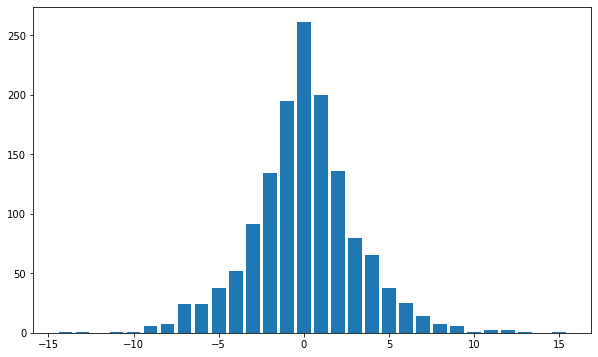

In [290]:
counter=collections.Counter(deltaList)
dely = list(counter.values())
delx = list(counter.keys())
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(delx,dely)
plt.show()

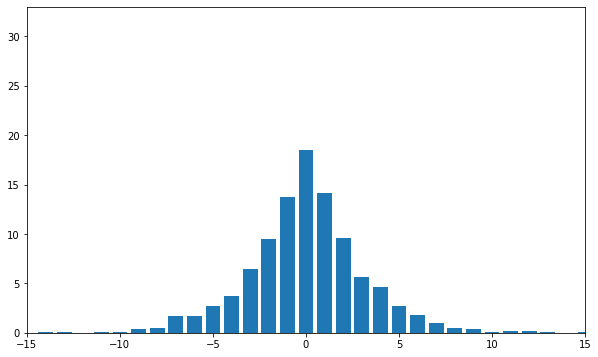

In [150]:
df_freq=pd.DataFrame(list(zip(delx,dely)),columns=['delta','freq'])
df_freq['pct'] = round(100.0*df_freq['freq']/sum(list(df_freq['freq'])),2)
delp = list(df_freq['pct'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(delx,delp)
plt.xlim([-15, 15])
plt.ylim([0, 33])
plt.show()

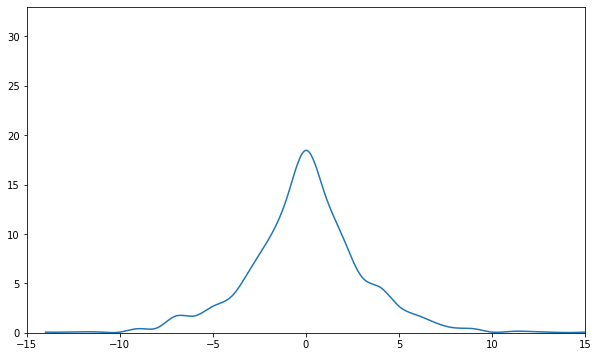

In [151]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(min(delx), max(delx), 500) 

#define spline
spl = make_interp_spline(delx, delp, k=3)
y_smooth = spl(xnew)

#create smooth line chart
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(xnew, y_smooth)
plt.xlim([-15, 15])
plt.ylim([0, 33])
plt.show()

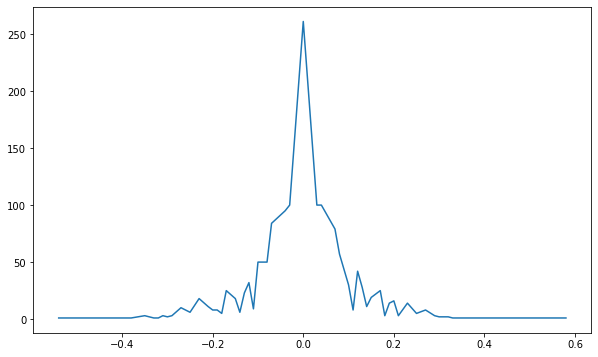

In [275]:
counter=collections.Counter(dlpctList)
dlpy = list(counter.values())
dlpx = list(counter.keys())
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dlpx,dlpy)
plt.show()

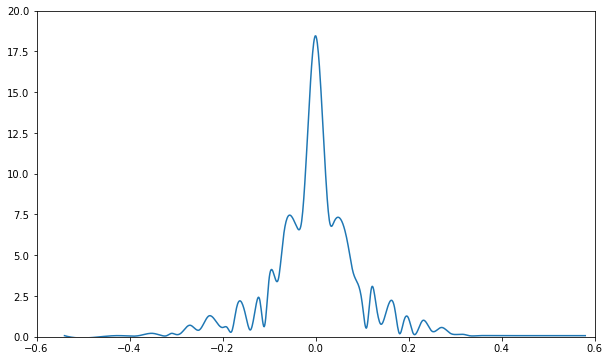

In [292]:
counter=collections.Counter(dlpctList)
dlpy = list(counter.values())
dlpx = list(counter.keys())

df_freq=pd.DataFrame(list(zip(dlpx,dlpy)),columns=['dlpct','freq'])
df_freq['pct'] = round(100.0*df_freq['freq']/sum(list(df_freq['freq'])),2)
dlpp = list(df_freq['pct'])

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(min(dlpx), max(dlpx), 1000) 

#define spline
spl = make_interp_spline(dlpx, dlpp, k=3)
y_smooth = spl(xnew)

#create smooth line chart`
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(xnew, y_smooth)
 
plt.show()

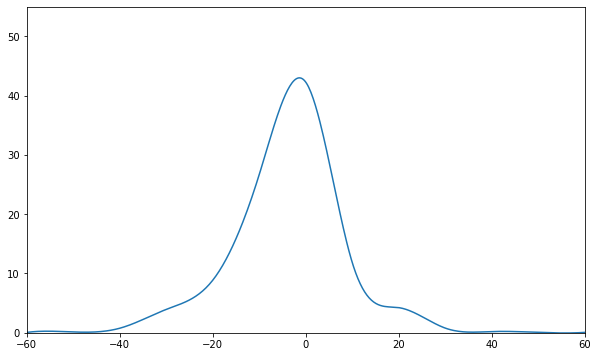

In [153]:
counter=collections.Counter(dlpttList)
dpty = list(counter.values())
dptx = list(counter.keys())

df_freq=pd.DataFrame(list(zip(dptx,dpty)),columns=['dlptt','freq'])
df_freq['pct'] = round(100.0*df_freq['freq']/sum(list(df_freq['freq'])),2)
dlpt = list(df_freq['pct'])

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(min(dptx), max(dptx), 500) 

#define spline
spl = make_interp_spline(dptx, dlpt, k=3)
y_smooth = spl(xnew)

#create smooth line chart`
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(xnew, y_smooth)
plt.xlim([-60, 60])
plt.ylim([0, 55])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

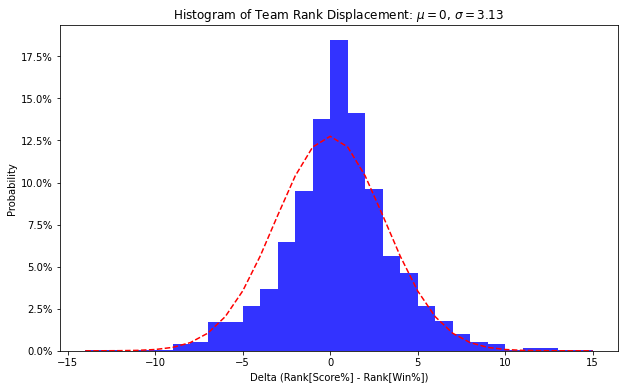

In [154]:
mu = round(statistics.mean(deltaList),2) # mean of distribution
sigma = round(statistics.pstdev(deltaList),2) # standard deviation of distribution
x = deltaList

num_bins = max(deltaList)-min(deltaList)
fig, ax = plt.subplots(figsize=(10, 6))

n, bins, patches = plt.hist(x, num_bins, density=True, weights=np.ones(len(x)), facecolor='blue', alpha=0.8)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Delta (Rank[Score%] - Rank[Win%])')
plt.ylabel('Probability')
plt.title(r'Histogram of Team Rank Displacement: $\mu=%s$, $\sigma=%s$' % (mu,sigma))

plt.show

In [155]:
n, bins, patches

(array([0.00070721, 0.00070721, 0.        , 0.00070721, 0.00070721,
        0.00424328, 0.0049505 , 0.01697313, 0.01697313, 0.02687412,
        0.03677511, 0.06435644, 0.09476662, 0.13790665, 0.18458274,
        0.14144272, 0.09618105, 0.05657709, 0.04596888, 0.02687412,
        0.01768034, 0.00990099, 0.0049505 , 0.00424328, 0.00070721,
        0.00141443, 0.00141443, 0.00070721, 0.00070721]),
 array([-14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,
         -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,
          8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.]),
 <BarContainer object of 29 artists>)

In [156]:
int(len(x)/num_bins)

48

<function matplotlib.pyplot.show(close=None, block=None)>

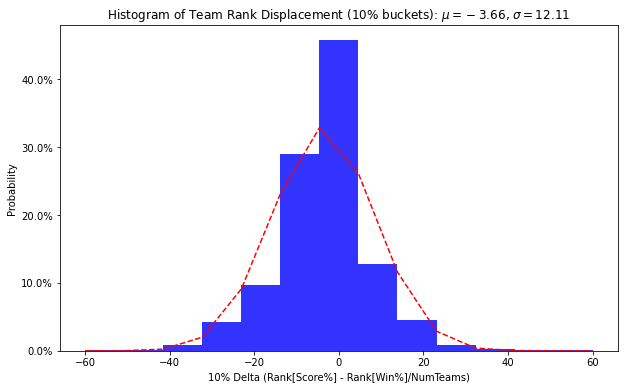

In [297]:
mu = round(statistics.mean(dlpttList),2) # mean of distribution
sigma = round(statistics.pstdev(dlpttList),2) # standard deviation of distribution
x = dlpttList

num_bins = 1+((max(x)-min(x))//10)
fig, ax = plt.subplots(figsize=(10, 6))

n, bins, patches = plt.hist(x, num_bins, density=True,facecolor='blue',weights=np.ones(len(x)),alpha=0.8)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)

plt.plot(bins, y, 'r--')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(4/18.6))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1/(100/10)))
plt.xlabel('10% Delta (Rank[Score%] - Rank[Win%]/NumTeams)')
plt.ylabel('Probability')
plt.title(r'Histogram of Team Rank Displacement (10%% buckets): $\mu=%s$, $\sigma=%s$' % (mu,sigma))

plt.show

In [344]:
len(set(dlpctList))

59

In [220]:
(2*max([max(dlpctList),-min(dlpctList)]))

120

In [223]:
round(120/61,0)

2.0

<function matplotlib.pyplot.show(close=None, block=None)>

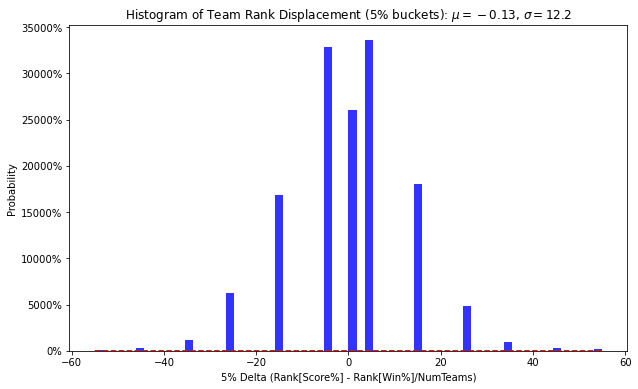

In [319]:
mu = round(statistics.mean(dapx),2) # mean of distribution
sigma = round(statistics.pstdev(dapx),2) # standard deviation of distribution
x = dapx

num_bins = 12
#num_bins = 1+((max(x)-min(x))//5)
fig, ax = plt.subplots(figsize=(10, 6))

n, bins, patches = plt.hist(x,bins='auto', facecolor='blue', alpha=0.8)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#lt.gca().yaxis.set_major_formatter(PercentFormatter(1/(100/20)))
plt.xlabel('5% Delta (Rank[Score%] - Rank[Win%]/NumTeams)')
plt.ylabel('Probability')
plt.title(r'Histogram of Team Rank Displacement (5%% buckets): $\mu=%s$, $\sigma=%s$' % (mu,sigma))

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

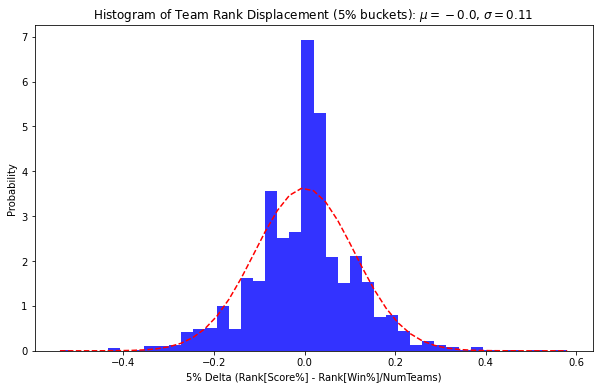

In [313]:
mu = round(statistics.mean(dlpctList),2) # mean of distribution
sigma = round(statistics.pstdev(dlpctList),2) # standard deviation of distribution
x = dlpctList

num_bins = 42
#num_bins = ((max(x)-min(x)))
fig, ax = plt.subplots(figsize=(10, 6))

n, bins, patches = plt.hist(x, num_bins, density=True, facecolor='blue', alpha=0.8)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#lt.gca().yaxis.set_major_formatter(PercentFormatter(1/(100/20)))
plt.xlabel('5% Delta (Rank[Score%] - Rank[Win%]/NumTeams)')
plt.ylabel('Probability')
plt.title(r'Histogram of Team Rank Displacement (5%% buckets): $\mu=%s$, $\sigma=%s$' % (mu,sigma))

plt.show

<BarContainer object of 59 artists>

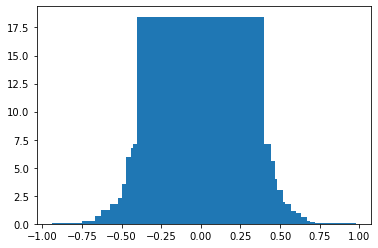

In [309]:

plt.bar(dlpx,dlpp)

<BarContainer object of 10 artists>

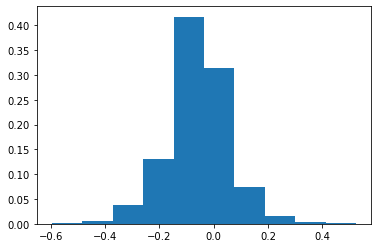

In [310]:
results, edges = np.histogram(dlpctList, density=True)
binWidth = edges[1] - edges[0]
plt.bar(edges[:-1], results*binWidth, binWidth)

In [345]:
100/sum(nx)

2.488888888888889

In [364]:
wl=[]
for i in dlpctList:
    wl.append(sum(nx))

<Figure size 432x288 with 0 Axes>

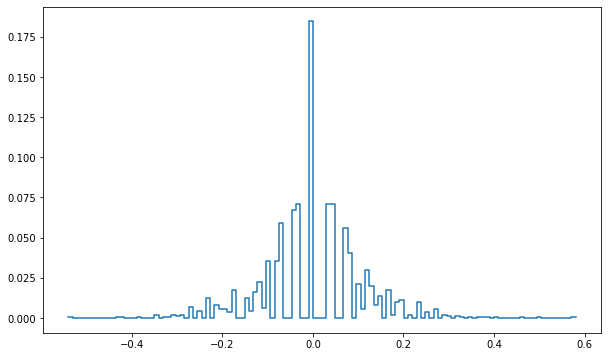

In [369]:
mu = round(statistics.mean(dlpctList),2) # mean of distribution
sigma = round(statistics.pstdev(dlpctList),2) # standard deviation of distribution

nx, xbins, ptchs = plt.hist(dlpctList,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctList:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctList,2*len((set(dlpctList))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.


nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x,y)

In [370]:
sum(nx)

105.35714285714307

In [372]:
bins

array([-55.        , -53.22580645, -51.4516129 , -49.67741935,
       -47.90322581, -46.12903226, -44.35483871, -42.58064516,
       -40.80645161, -39.03225806, -37.25806452, -35.48387097,
       -33.70967742, -31.93548387, -30.16129032, -28.38709677,
       -26.61290323, -24.83870968, -23.06451613, -21.29032258,
       -19.51612903, -17.74193548, -15.96774194, -14.19354839,
       -12.41935484, -10.64516129,  -8.87096774,  -7.09677419,
        -5.32258065,  -3.5483871 ,  -1.77419355,   0.        ,
         1.77419355,   3.5483871 ,   5.32258065,   7.09677419,
         8.87096774,  10.64516129,  12.41935484,  14.19354839,
        15.96774194,  17.74193548,  19.51612903,  21.29032258,
        23.06451613,  24.83870968,  26.61290323,  28.38709677,
        30.16129032,  31.93548387,  33.70967742,  35.48387097,
        37.25806452,  39.03225806,  40.80645161,  42.58064516,
        44.35483871,  46.12903226,  47.90322581,  49.67741935,
        51.4516129 ,  53.22580645,  55.        ])

In [371]:
nx

array([ 0.07451   ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.07451   ,  0.07451   ,  0.        ,  0.        ,
        0.        ,  0.07451   ,  0.        ,  0.        ,  0.        ,
        0.22353001,  0.        ,  0.07451   ,  0.07451   ,  0.22353001,
        0.14902   ,  0.22353001,  0.        ,  0.74510002,  0.        ,
        0.44706001,  0.        ,  1.34118004,  0.        ,  0.81961002,
        0.59608002,  0.59608002,  0.37255001,  1.86275005,  0.        ,
        0.        ,  1.34118004,  0.44706001,  1.71373005,  2.38432006,
        0.67059002,  3.7255001 ,  0.        ,  3.7255001 ,  6.25884017,
        0.        ,  0.        ,  7.07845019,  7.4510002 ,  0.        ,
        0.        , 19.44711053,  0.        ,  0.        ,  0.        ,
        7.4510002 ,  7.4510002 ,  0.        ,  0.        ,  5.88629016,
        4.24707012,  0.        ,  2.23530006,  0.59608002,  3.12

In [234]:
nx_frac

array([0.01639344, 0.        , 0.        , 0.        , 0.        ,
       0.01639344, 0.01639344, 0.        , 0.01639344, 0.        ,
       0.04918033, 0.03278689, 0.08196721, 0.04918033, 0.16393443,
       0.09836066, 0.29508197, 0.09836066, 0.3442623 , 0.08196721,
       0.40983607, 0.39344262, 0.54098361, 1.32786885, 0.21311475,
       0.7704918 , 1.21311475, 3.19672131, 0.        , 4.27868852,
       0.        , 3.27868852, 1.09836066, 1.13114754, 0.62295082,
       0.52459016, 0.62295082, 0.49180328, 0.45901639, 0.2295082 ,
       0.31147541, 0.        , 0.2295082 , 0.21311475, 0.03278689,
       0.01639344, 0.03278689, 0.04918033, 0.01639344, 0.03278689,
       0.        , 0.03278689, 0.        , 0.        , 0.01639344,
       0.        , 0.        , 0.01639344, 0.        , 0.        ,
       0.01639344])

In [235]:
nx

array([  1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   3.,
         2.,   5.,   3.,  10.,   6.,  18.,   6.,  21.,   5.,  25.,  24.,
        33.,  81.,  13.,  47.,  74., 195.,   0., 261.,   0., 200.,  67.,
        69.,  38.,  32.,  38.,  30.,  28.,  14.,  19.,   0.,  14.,  13.,
         2.,   1.,   2.,   3.,   1.,   2.,   0.,   2.,   0.,   0.,   1.,
         0.,   0.,   1.,   0.,   0.,   1.])

In [207]:
x

array([-53., -52., -52., -51., -51., -50., -50., -49., -49., -48., -48.,
       -47., -47., -46., -46., -45., -45., -44., -44., -43., -43., -42.,
       -42., -41., -41., -40., -40., -39., -39., -38., -38., -37., -37.,
       -36., -36., -35., -35., -34., -34., -33., -33., -32., -32., -31.,
       -31., -30., -30., -29., -29., -28., -28., -27., -27., -26., -26.,
       -25., -25., -24., -24., -23., -23., -22., -22., -21., -21., -20.,
       -20., -19., -19., -18., -18., -17., -17., -16., -16., -15., -15.,
       -14., -14., -13., -13., -12., -12., -11., -11., -10., -10.,  -9.,
        -9.,  -8.,  -8.,  -7.,  -7.,  -6.,  -6.,  -5.,  -5.,  -4.,  -4.,
        -3.,  -3.,  -2.,  -2.,  -1.,  -1.,   0.,   0.,   1.,   1.,   2.,
         2.,   3.,   3.,   4.,   4.,   5.,   5.,   6.,   6.,   7.,   7.,
         8.,   8.,   9.,   9.,  10.,  10.,  11.,  11.,  12.,  12.,  13.,
        13.,  14.,  14.,  15.,  15.,  16.,  16.,  17.,  17.,  18.,  18.,
        19.,  19.,  20.,  20.,  21.,  21.,  22.,  2

In [ ]:
pd.DataFrame(list(zip(dptx,dpty,dlpt)),columns=['dlptt','freq','pct'])

In [165]:
dfpct = pd.DataFrame(list(zip(dlpx,dlpy,dlpp)),columns=['dlpct','freq','pct'])
dfpct[dfpct['dlpct'] == 0]

,dlpct,freq,pct
29,0,261,18.46


In [197]:
print(dfpct.to_string(index=False))

 dlpct  freq    pct
   -53     1   0.07
   -43     1   0.07
   -42     1   0.07
   -38     1   0.07
   -34     3   0.21
   -33     1   0.07
   -32     1   0.07
   -30     5   0.35
   -29     2   0.14
   -28     1   0.07
   -26    10   0.71
   -25     6   0.42
   -23    18   1.27
   -21     6   0.42
   -20    13   0.92
   -19     8   0.57
   -17     5   0.35
   -16    25   1.77
   -15    18   1.27
   -14     6   0.42
   -13    23   1.63
   -12    10   0.71
   -11    22   1.56
   -10    59   4.17
    -8    13   0.92
    -7    47   3.32
    -6    74   5.23
    -4    25   1.77
    -3   170  12.02
     0   261  18.46
     3   175  12.38
     4    25   1.77
     6    67   4.74
     7    49   3.47
     8    20   1.41
    10    38   2.69
    11    32   2.26
    12    10   0.71
    13    28   1.98
    14    11   0.78
    15    19   1.34
    16    25   1.77
    17     3   0.21
    19    14   0.99
    20    19   1.34
    23    14   0.99
    25     5   0.35
    26     8   0.57
    28     2   0.14


In [208]:
pd.DataFrame(list(zip(delx,dely,delp)),columns=['delta','freq','pct'])

,delta,freq,pct
0,-14,1,0.07
1,-13,1,0.07
2,-11,1,0.07
3,-10,1,0.07
4,-9,6,0.42
5,-8,7,0.50
6,-7,24,1.70
7,-6,24,1.70
8,-5,38,2.69
9,-4,52,3.68
